In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data
1. Use pandas read_excel to load the data.
2. Check for null values in the data. If missing data is present, impute the data using sklearn or fill the null values using mean, median and mode fillna() methods.
3. Describe the data.

In [2]:
train_data = pd.read_excel("Data_Train.xlsx")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
pd.set_option('display.max_columns', None) #display all columns present in the dataset

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data.info() #object data types mean string data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
train_data.shape

(10683, 11)

Price is the dependent feature, the rest are independent features.

The model will not be able to understand the 'Duration' feature, so we will have to pre-process it.

In [9]:
#checking unique values of Duration column
train_data["Duration"].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [11]:
#Checking and dropping null values
train_data.dropna(inplace = True)

In [13]:
train_data.shape #just 1 observation has been removed

(10682, 11)

In [14]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA

Since the Date_of_Journey is of object datatype, we will have to convert this into a timestamp using the datetime library for the model to understand this.

.dt.day method will extract the day of that date.

.dt.month method will extract the month of that date.

In [16]:
train_data["Day"] = pd.to_datetime(train_data.Date_of_Journey, format = '%d/%m/%Y').dt.day
train_data["Month"] = pd.to_datetime(train_data.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [17]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


The data is only for 2019, so we can omit the Date_of_Journey column.

In [18]:
train_data.drop(['Date_of_Journey'], axis = 1, inplace = True)

Departure time is when the plane leaves the gate, so we will extract the hour and minutes at which the plane leaves.

In [20]:
#Extracting hours and minutes
train_data['Dep_Hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_Minutes'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

/var/folders/qf/7j3lvnwx0xn_ltwl3rkzpt_w0000gn/T/ipykernel_44009/507521890.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Dep_Hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
/var/folders/qf/7j3lvnwx0xn_ltwl3rkzpt_w0000gn/T/ipykernel_44009/507521890.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Dep_Minutes'] = pd.to_datetime(train_data['Dep_Time']).dt.minute


In [21]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Since we have the hour and minutes of the departure time, we can drop the 'Dep_Time' feature as well.

In [22]:
train_data.drop('Dep_Time', axis = 1, inplace = True)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


We will do the same for Arrival_Time: get the hour and minutes and drop teh column.

In [24]:
#Extract hours
train_data["Arrival_Hour"] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

/var/folders/qf/7j3lvnwx0xn_ltwl3rkzpt_w0000gn/T/ipykernel_44009/1200998101.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_Hour"] = pd.to_datetime(train_data['Arrival_Time']).dt.hour


In [25]:
#Extract minutes
train_data["Arrival_Minutes"] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

/var/folders/qf/7j3lvnwx0xn_ltwl3rkzpt_w0000gn/T/ipykernel_44009/3915729162.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_Minutes"] = pd.to_datetime(train_data['Arrival_Time']).dt.minute


In [26]:
train_data.drop('Arrival_Time', axis = 1, inplace = True)

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [29]:
#Extract hours and minutes from the 'Duration' column into a list
duration = list(train_data['Duration'])
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [31]:
#Check if duration contains only hours or only minutes
for i in range(len(duration)):
    if (len(duration[i].split()) != 2):
        if "h" in duration[i]:
            duration[i] = duration[i]. strip() + " 0m" #add 0 minutes if just hours are given
        else:
            duration[i] = "0h " +  duration[i] #add 0 hours if just minutes are given

#get list of duration hours and minutes
duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) #extract hours from duration
    duration_minutes.append(int(duration[i].split(sep = "m")[0].split()[-1])) #extract only minutes from duration


In [32]:
# Add duration_hours and duration_minutes lists as columns in the dataframe
train_data["Duration Hours"] = duration_hours
train_data["Duration Minutes"] = duration_minutes

In [33]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration Hours,Duration Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [34]:
#Drop Duration column since we now have duration hours and minutes
train_data.drop('Duration', axis = 1, inplace = True)

In [35]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration Hours,Duration Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data

In feature data. In categorical data, we can have either nominal data (where data is not in order) or ordinal data (where data is in order). In nominal data, we use One Hot Encoding. In ordinal data, we use Label Encoding.

In [38]:
train_data["Airline"].value_counts() 

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

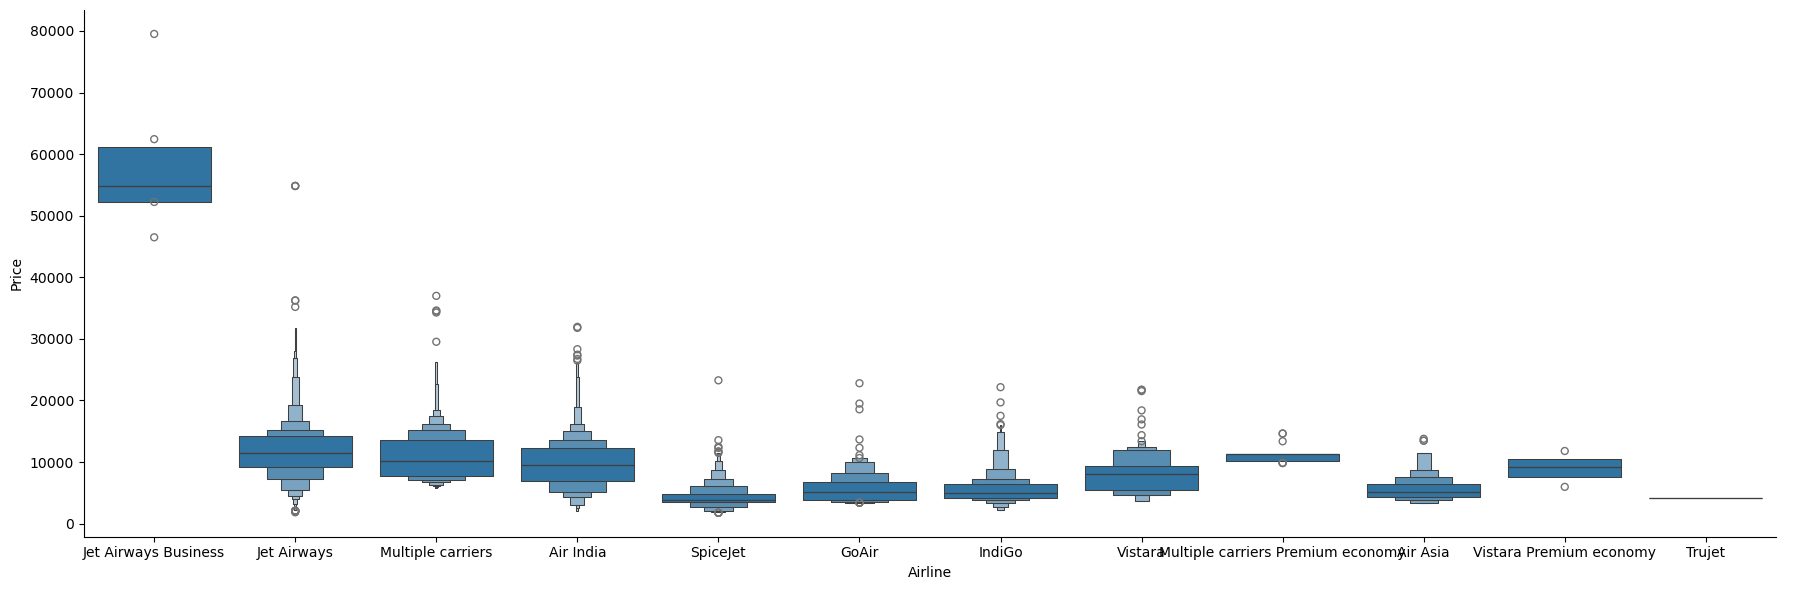

In [39]:
#Check the relationship between Airline and Price. We will use categorical plots, with Airline in the x axis and Price in the y axis.
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price",ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

All the prices are almost the same for all airlines, except for Jet Airways Business.

Since airline data is not in order, we use one hot encoding.

In [40]:
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True) #get_dummies is one-hot encoding technique. drop_first drops the feature not required
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [41]:
#Source is also a categorical feature
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

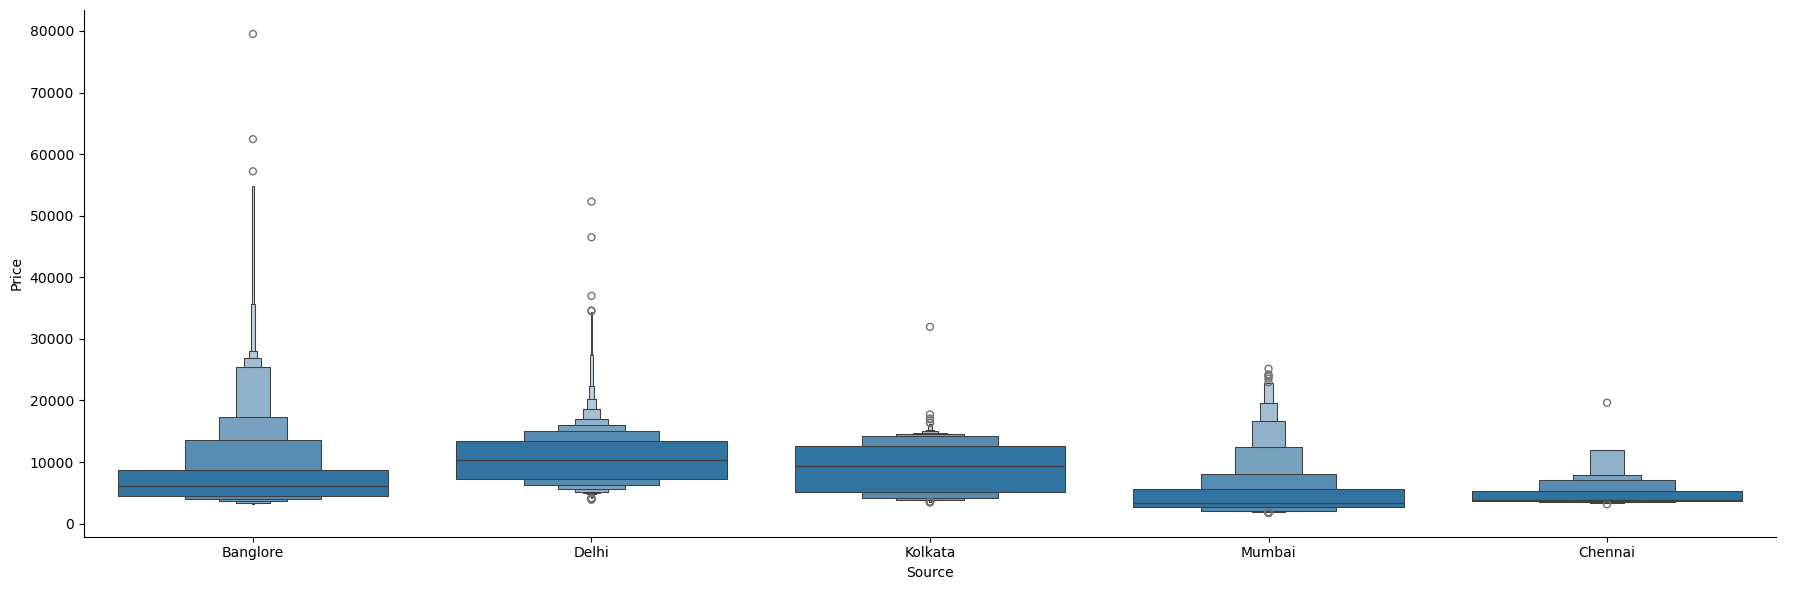

In [44]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price",ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show() #Bangalore and Delhi have a higher number of outliers as far as price is concerned

Since Source data is not in order, we use one hot encoding.

In [46]:
Source = train_data[["Source"]]
Source = pd.get_dummies(Source, drop_first = True) #get_dummies is one-hot encoding technique. drop_first drops the feature not required
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [47]:
#Destination is also a categorical feature
train_data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

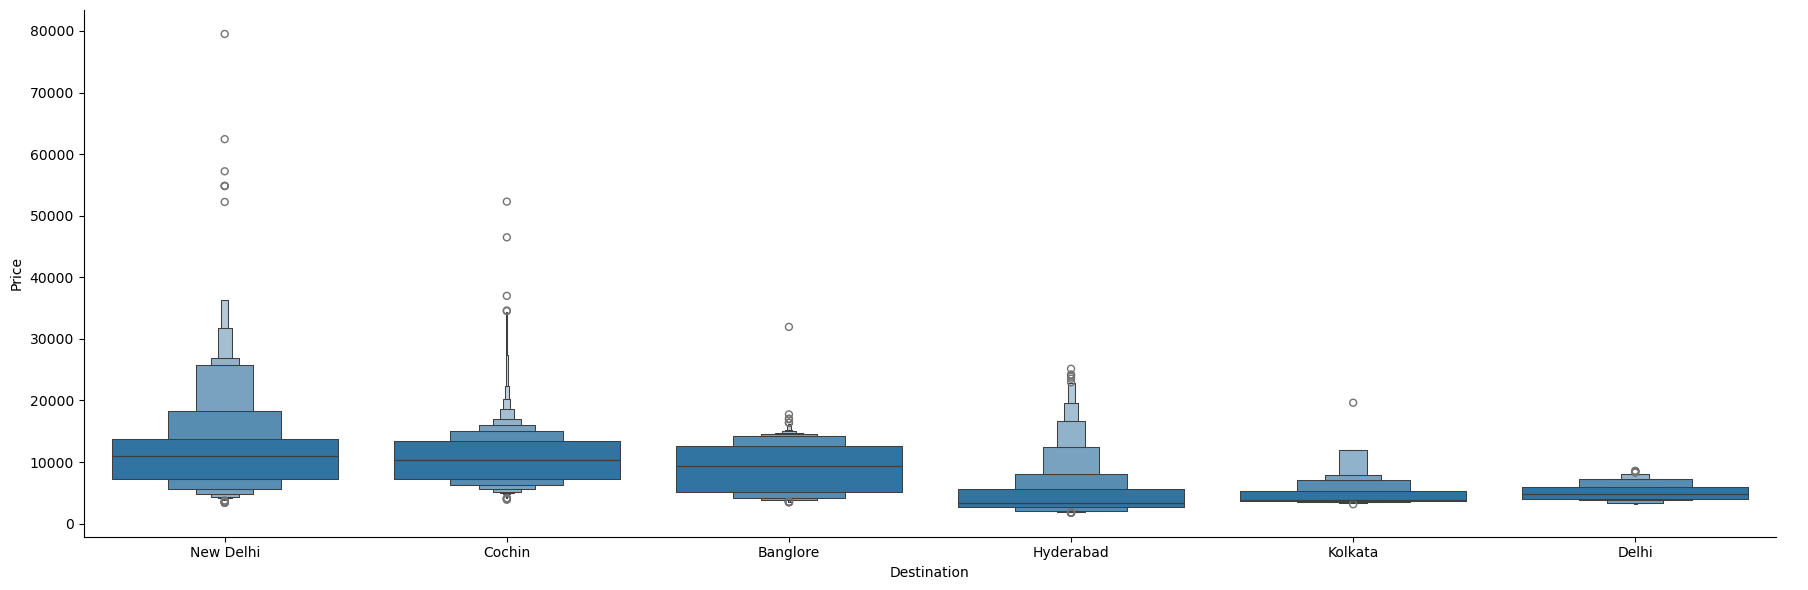

In [49]:
sns.catplot(y = "Price", x = "Destination", data = train_data.sort_values("Price",ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show() 

In [50]:
Destination = train_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True) #get_dummies is one-hot encoding technique. drop_first drops the feature not required
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [51]:
#Let's now look at stoppage using the route
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [52]:
#since we already have the the 'Total_Stops' column, we can drop the Route feature
train_data.drop('Route', axis = 1, inplace = True)

In [54]:
#Let's now look at the Additional_Info feature
train_data.Additional_Info.value_counts() 

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [55]:
#Since about 80% of data in the Additional_Info feature is that of 'No info,' we can drop that column as well
train_data.drop('Additional_Info', axis = 1, inplace = True)

In [57]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration Hours,Duration Minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [58]:
#We know that Route and Total_Stops are related to each other
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

Now, Total_Stops does have an order, this is an example of Ordinal data, which is why we will perform label encoding.
Based on the data, when the number of stops increases, the price also increases (look at the data instead of going by assumptions).

In [69]:

train_data = train_data.replace({"non-stop":0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [70]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration Hours,Duration Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


Now, let's concatenate the encoded information of Airline, Source, and Destination to the train_data. 

In [73]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration Hours,Duration Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


Now, we can drop the Airline, Source, Destination columns since we do not need them anymore.

In [74]:
data_train.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

In [75]:
data_train.head()

,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration Hours,Duration Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [78]:
data_train = data_train.replace({False: 0, True: 1})

data_train.head()

In [81]:
data_train.shape #30 features

(10682, 30)

We are not combining the train and test data together and are doing the preprocessing steps separately because we want to avoid data leakage. If we would combine train and test data, the model could find patterns in the data and overfit to the data.

Data leakage is a critical problem and we should take care of it by preprocessing separately!

## Test Data

In [82]:
test_data = pd.read_excel("Test_set.xlsx")

In [83]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Doing Test Data Preprocessing: Same as Train Data

In [84]:
test_data["Day"] = pd.to_datetime(test_data.Date_of_Journey, format = '%d/%m/%Y').dt.day
test_data["Month"] = pd.to_datetime(test_data.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [85]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [86]:
test_data.drop('Date_of_Journey', axis = 1, inplace = True)

In [87]:
#Extracting hours and minutes
test_data['Dep_Hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_Minutes'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop('Dep_Time', axis = 1, inplace = True)

/var/folders/qf/7j3lvnwx0xn_ltwl3rkzpt_w0000gn/T/ipykernel_44009/4187090577.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Dep_Hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
/var/folders/qf/7j3lvnwx0xn_ltwl3rkzpt_w0000gn/T/ipykernel_44009/4187090577.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['Dep_Minutes'] = pd.to_datetime(test_data['Dep_Time']).dt.minute


In [88]:
test_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Dep_Hour,Dep_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [89]:
#Extract hours
test_data["Arrival_Hour"] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
#Extract minutes
test_data["Arrival_Minutes"] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop('Arrival_Time', axis = 1, inplace = True)

/var/folders/qf/7j3lvnwx0xn_ltwl3rkzpt_w0000gn/T/ipykernel_44009/3966896181.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_Hour"] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
/var/folders/qf/7j3lvnwx0xn_ltwl3rkzpt_w0000gn/T/ipykernel_44009/3966896181.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_Minutes"] = pd.to_datetime(test_data['Arrival_Time']).dt.minute


In [90]:
duration_test = list(test_data['Duration'])
duration_test

['10h 55m',
 '4h',
 '23h 45m',
 '13h',
 '2h 50m',
 '18h 20m',
 '15h 5m',
 '5h 15m',
 '2h 45m',
 '6h 5m',
 '28h 55m',
 '9h 20m',
 '10h 15m',
 '4h 40m',
 '17h 20m',
 '10h 50m',
 '9h 15m',
 '12h 15m',
 '9h 10m',
 '9h 20m',
 '14h 50m',
 '14h 5m',
 '11h 35m',
 '13h 30m',
 '2h 50m',
 '12h 25m',
 '2h 30m',
 '25h 30m',
 '19h 25m',
 '7h',
 '2h 30m',
 '11h 40m',
 '7h 5m',
 '3h',
 '1h 25m',
 '2h 40m',
 '1h 25m',
 '6h 5m',
 '17h 5m',
 '10h 40m',
 '2h 30m',
 '12h 30m',
 '1h 30m',
 '23h 40m',
 '5h 15m',
 '2h 20m',
 '23h 35m',
 '1h 30m',
 '27h 40m',
 '13h 30m',
 '28h 20m',
 '5h 45m',
 '26h 25m',
 '5h 40m',
 '2h 15m',
 '2h 55m',
 '5h 45m',
 '7h 30m',
 '5h 20m',
 '25h 50m',
 '13h 15m',
 '26h 20m',
 '5h 45m',
 '5h 40m',
 '2h 40m',
 '2h 50m',
 '5h 25m',
 '8h 45m',
 '3h',
 '7h 20m',
 '1h 30m',
 '21h 10m',
 '16h',
 '7h 50m',
 '1h 30m',
 '3h',
 '2h 50m',
 '19h 25m',
 '2h 55m',
 '14h 5m',
 '2h 50m',
 '16h 5m',
 '5h 55m',
 '2h 30m',
 '10h 15m',
 '13h 50m',
 '2h 15m',
 '11h 55m',
 '2h 30m',
 '13h 20m',
 '18h 1

In [91]:
#Check if duration contains only hours or only minutes
for i in range(len(duration_test)):
    if (len(duration_test[i].split()) != 2):
        if "h" in duration_test[i]:
            duration_test[i] = duration_test[i]. strip() + " 0m" #add 0 minutes if just hours are given
        else:
            duration_test[i] = "0h " +  duration_test[i] #add 0 hours if just minutes are given

#get list of duration hours and minutes
duration_hours_test = []
duration_minutes_test = []

for i in range(len(duration_test)):
    duration_hours_test.append(int(duration_test[i].split(sep = "h")[0])) #extract hours from duration
    duration_minutes_test.append(int(duration_test[i].split(sep = "m")[0].split()[-1])) #extract only minutes from duration


In [92]:
# Add duration_hours and duration_minutes lists as columns in the dataframe
test_data["Duration Hours"] = duration_hours_test
test_data["Duration Minutes"] = duration_minutes_test
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration Hours,Duration Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45,2,50


In [93]:
#Drop Duration column since we now have duration hours and minutes
test_data.drop('Duration', axis = 1, inplace = True)

### Handling Categorical Data in Test Dataset

In [95]:
Airline_Test = test_data[["Airline"]]
Airline_Test = pd.get_dummies(Airline_Test, drop_first = True) #get_dummies is one-hot encoding technique. drop_first drops the feature not required
Airline_Test.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,False,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [97]:
Source_Test = test_data[["Source"]]
Source_Test = pd.get_dummies(Source_Test, drop_first = True) #get_dummies is one-hot encoding technique. drop_first drops the feature not required
Source_Test.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,False,True,False,False
4,False,False,False,False


In [98]:
Destination_Test = test_data[["Destination"]]
Destination_Test = pd.get_dummies(Destination_Test, drop_first = True) #get_dummies is one-hot encoding technique. drop_first drops the feature not required
Destination_Test.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,True,False,False,False,False
1,False,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,False,True,False,False,False


In [99]:
#since we already have the the 'Total_Stops' column, we can drop the Route feature
test_data.drop('Route', axis = 1, inplace = True)

In [100]:
#Let's now look at the Additional_Info feature
test_data.Additional_Info.value_counts() 

Additional_Info
No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: count, dtype: int64

In [101]:
#Since most of the data in the Additional_Info feature is that of 'No info,' we can drop that column as well
test_data.drop('Additional_Info', axis = 1, inplace = True)

In [102]:
#We know that Route and Total_Stops are related to each other
test_data["Total_Stops"].value_counts()

Total_Stops
1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: count, dtype: int64

In [103]:
test_data = test_data.replace({"non-stop":0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [104]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Day,Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration Hours,Duration Minutes
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


Now, let's concatenate the encoded information of Airline, Source, and Destination to the test_data.

In [105]:
data_test = pd.concat([test_data, Airline_Test, Source_Test, Destination_Test], axis = 1)
data_test.head()

,Airline,Source,Destination,Total_Stops,Day,Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration Hours,Duration Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


Now, we can drop the Airline, Source, Destination columns since we do not need them anymore.

In [106]:
data_test.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

In [109]:
data_test = data_test.replace({False: 0, True: 1})

In [110]:
data_test.head()

,Total_Stops,Day,Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration Hours,Duration Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Feature Selection

Selecting the best features having a good relationship with the target variable in the model is important. The following are some feature selection techniques:
1. Heatmap
2. feature_importance_
3. SelectKBest

In [111]:
data_train.shape

(10682, 30)

In [113]:
data_train.columns

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Dep_Hour', 'Dep_Minutes',
       'Arrival_Hour', 'Arrival_Minutes', 'Duration Hours', 'Duration Minutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [114]:
X = data_train.loc[:, ['Total_Stops', 'Day', 'Month', 'Dep_Hour', 'Dep_Minutes',
       'Arrival_Hour', 'Arrival_Minutes', 'Duration Hours', 'Duration Minutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Day,Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration Hours,Duration Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [115]:
y = data_train.iloc[:, 1] #Take independent feature
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [123]:
train_data.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)
train_data

,Total_Stops,Price,Day,Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration Hours,Duration Minutes
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30
10679,0,4145,27,4,20,45,23,20,2,35
10680,0,7229,27,4,8,20,11,20,3,0
10681,0,12648,1,3,11,30,14,10,2,40


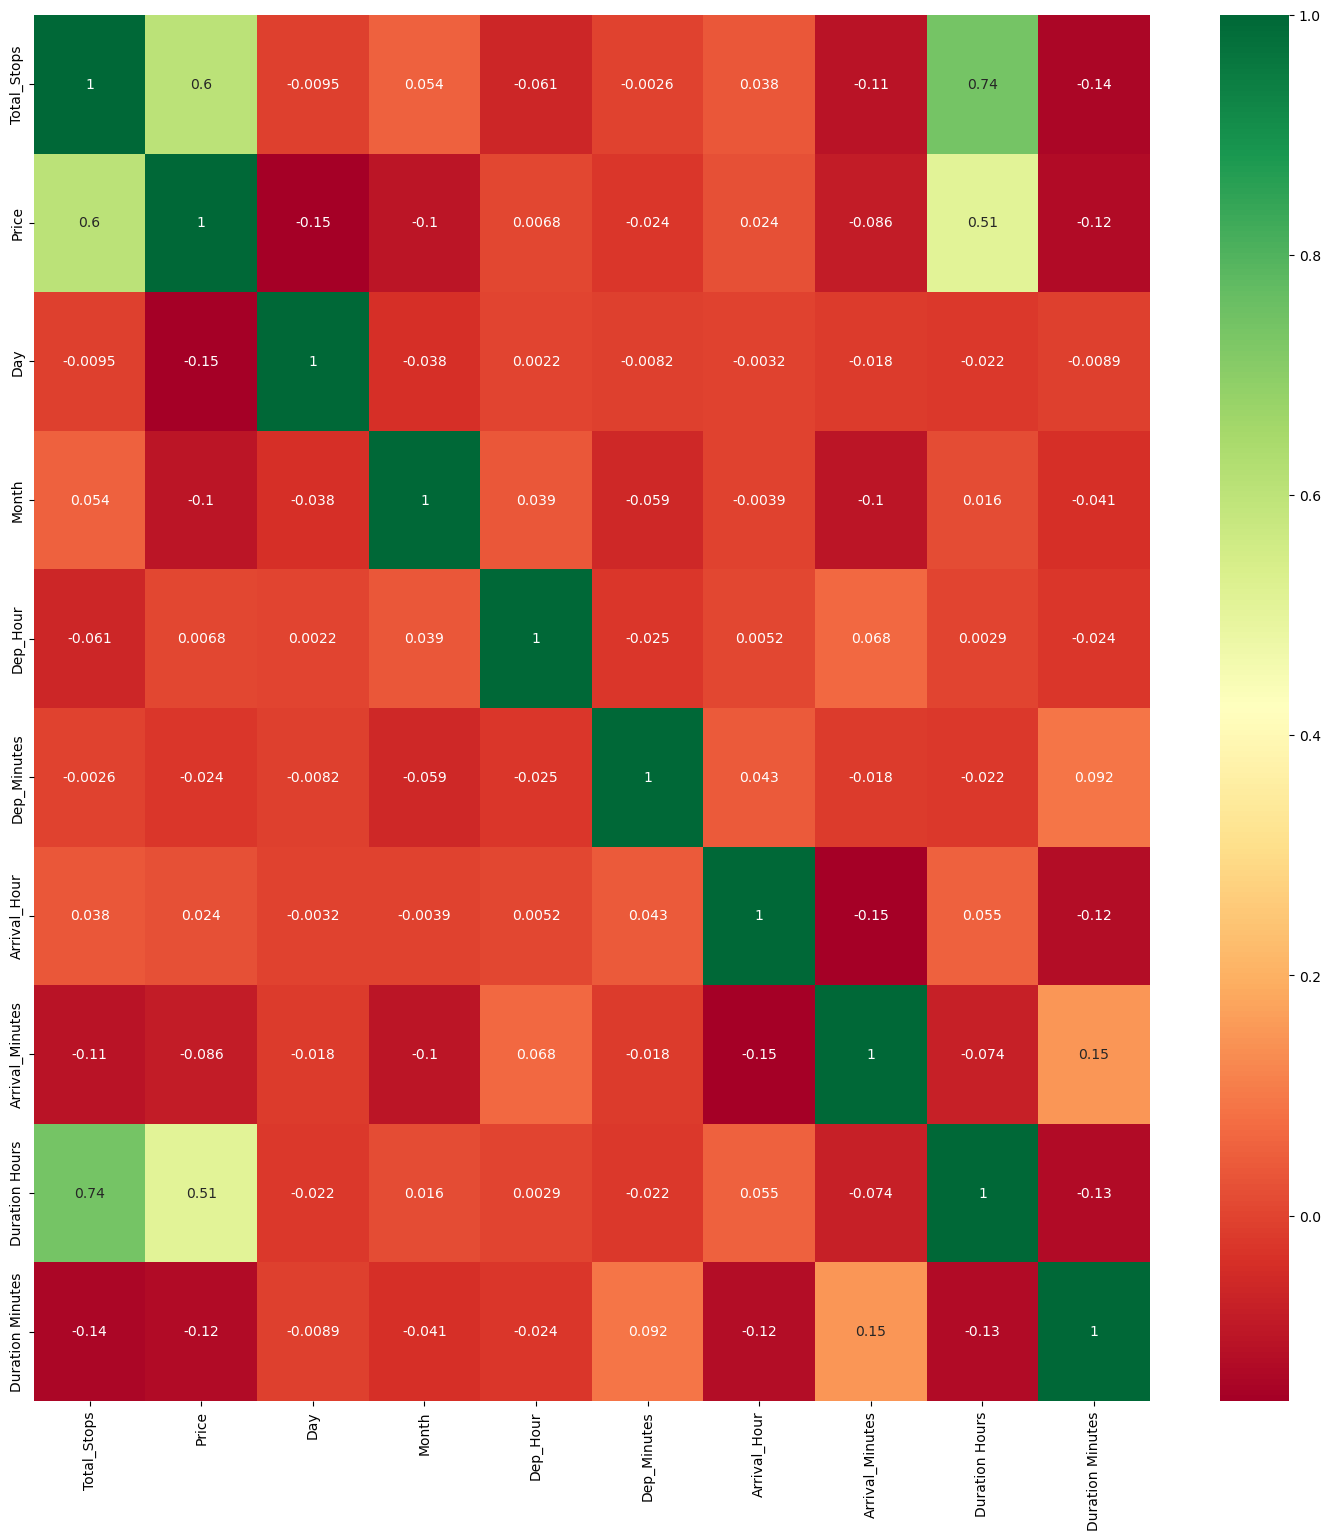

In [124]:
#Find correlation between dependent and indepependent features
plt.figure(figsize = (18, 18))
sns.heatmap(train_data.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

In [126]:
#Get important features using ExtraTreesRegressor
#If two independent features are highly correlated, we can drop one of them
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [127]:
print(selection.feature_importances_)

[2.45810341e-01 1.44209415e-01 5.37658879e-02 2.40813408e-02
 2.11563296e-02 2.77182946e-02 1.92058456e-02 1.00146344e-01
 1.79469990e-02 9.79352851e-03 1.94600582e-03 1.72614132e-02
 1.41326863e-01 6.70211494e-02 1.90031710e-02 9.07337447e-04
 2.96261917e-03 1.02949596e-04 5.14374318e-03 8.76420268e-05
 4.86048263e-04 8.63764781e-03 3.22446053e-03 7.43754790e-03
 9.90343213e-03 1.71442753e-02 8.30902511e-03 5.15547967e-04
 2.47447942e-02]


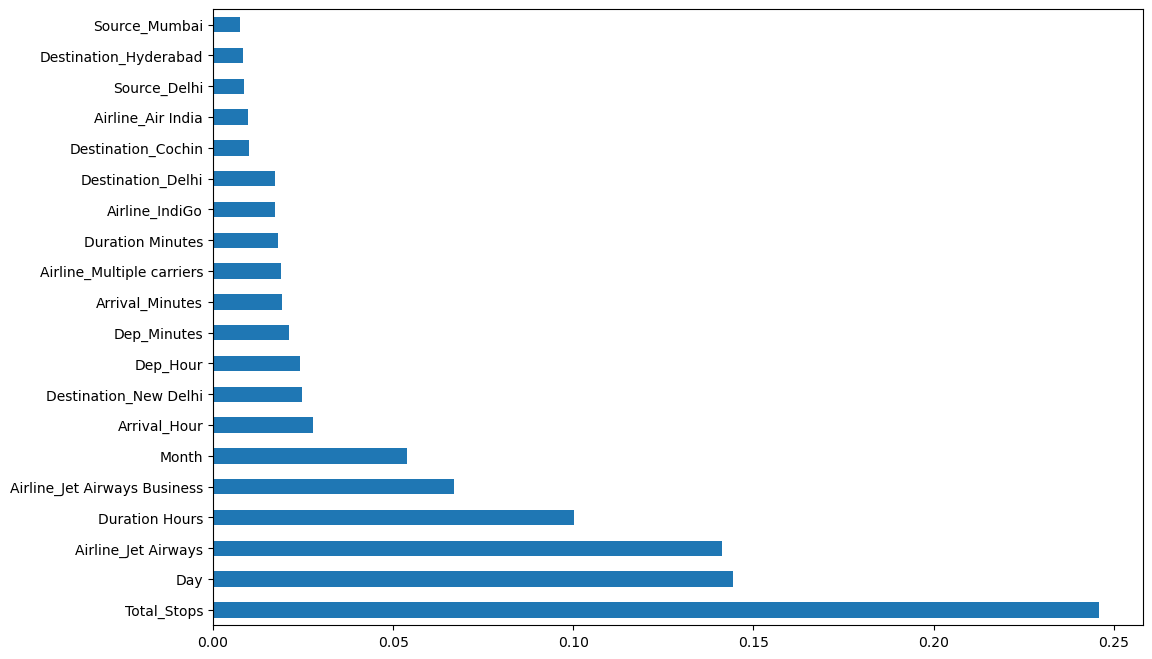

In [129]:
#Plot graph of feature importances for better visualization
plt.figure(figsize = (12, 8))
feature_importances = pd.Series(selection.feature_importances_, index = X.columns)
feature_importances.nlargest(20).plot(kind = 'barh') #get the 20 features with the greatest feature importances
plt.show()

## Model Fitting Using Random Forest Regressor

1. Split dataset into train and test set to predict the flight fare.
2. Import the model (scaling is not performed on random forests).
3. Fit the data
4. Predict flight fare
5. Check RMSE score for regression
6. Plot graph

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [131]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [132]:
y_pred = reg_rf.predict(X_test)

In [133]:
reg_rf.score(X_train, y_train)

0.9533441902230634

In [134]:
reg_rf.score(X_test, y_test)

0.7970386224957351

/var/folders/qf/7j3lvnwx0xn_ltwl3rkzpt_w0000gn/T/ipykernel_44009/4027603224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


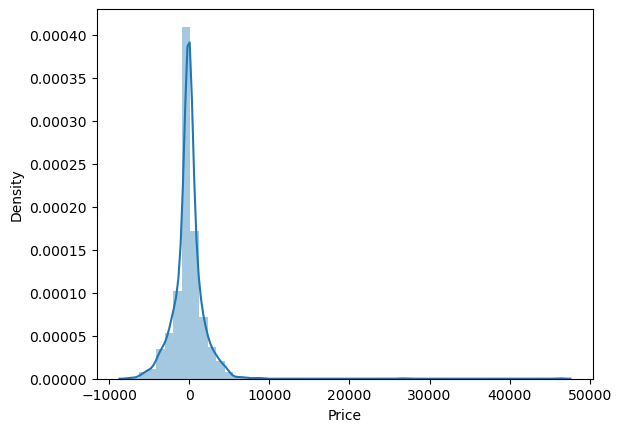

In [136]:
sns.distplot(y_test - y_pred)
plt.show() #a gaussian distribution is a good sign

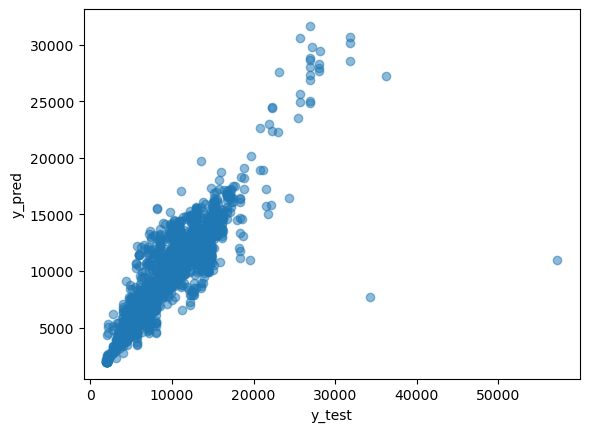

In [138]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show() #scatter plot is in increasing order

In [139]:
from sklearn import metrics #check performance of model
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1177.9605763480397
MSE: 4376264.653376423
RMSE: 2091.952354470919


In [140]:
metrics.r2_score(y_test, y_pred)

0.7970386224957351

## Hyperparameter Tuning

You can use one of the following methods for hyperparameter tuning:
1. RandomizedSearchCV (faster method for hyperparameter tuning)
2. GridSearchCV

Assign the hyperparameters in the form of a dictionary, fit the model, check the best parameters and best score.

In [141]:
from sklearn.model_selection import RandomizedSearchCV

In [143]:
#Create the dictionary to get the best parameters for the 

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#Number of features to consider at each split
max_features = ['auto','sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#Minimum number of samples needed to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples needed at each node\
min_samples_leaf = [1, 2, 5, 10]

In [144]:
# Create random grid:
random_grid = {'n_estimators':n_estimators, 'max_features': max_features, 'max_depth':max_depth, 'min_samples_split':min_samples_split, "min_samples_leaf": min_samples_leaf }

In [145]:
#perform RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [146]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pack

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [147]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [148]:
 predictions = rf_random.predict(X_test)

In [149]:
predictions

array([16586.93418182,  5521.713     ,  8857.275     , ...,
        6592.0866    , 12721.5729    , 13003.71491783])

/var/folders/qf/7j3lvnwx0xn_ltwl3rkzpt_w0000gn/T/ipykernel_44009/3999133266.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predictions)


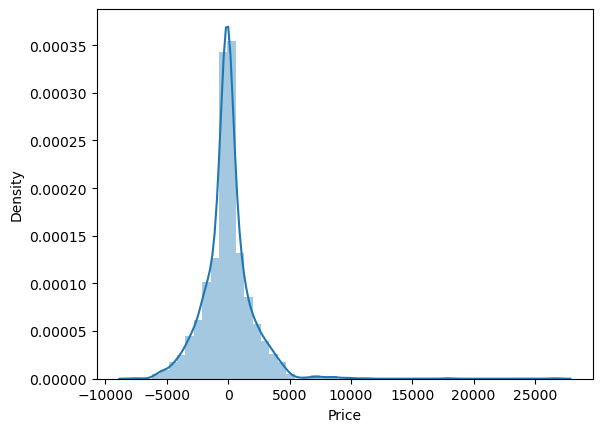

In [150]:
sns.distplot(y_test - predictions)
plt.show() #a gaussian distribution is a good sign

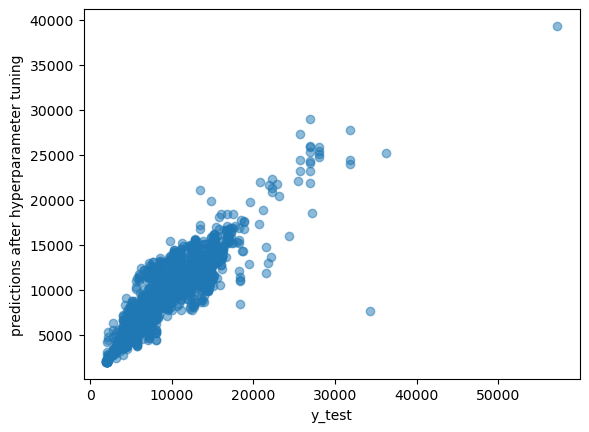

In [151]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("predictions after hyperparameter tuning")
plt.show() #scatter plot is in increasing order

In [152]:
from sklearn import metrics #check performance of model
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1263.7524554620977
MSE: 3883212.2673608726
RMSE: 1970.586782499282


## Save the Model for Future Use

In [153]:
import pickle
file = open('flight_random_forests.pkl', 'wb')

pickle.dump(reg_rf, file)

In [ ]:
model = open